In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import json

In [2]:
with open('results/NRE_test_result.json','r',encoding='UTF-8')as f:
    res=json.load(f)

In [3]:
part=res['Results'][-1]
print(part['Metadata']['model_name'])
list=part['Metadata']['class_name']
data=part['Result']
flat=[]
for i in range(len(list)):
    flat.append([data['Categorical']['precision'][i],data['Categorical']['recall'][i],data['Categorical']['f1'][i]])
for t in ['Weighted','Macro','Micro']:
    flat.append([data[t]['precision'],data[t]['recall'],data[t]['f1']])

roberta-base_EP5_BS16_LR3e-05_ML128


In [4]:
list.extend(['Weighted','Macro','Micro'])
tab=pd.DataFrame(flat,index=list,columns=['precision','recall','f1score'])
tab

,precision,recall,f1score
"Message-Topic(e1,e2)",0.831050,0.866667,0.848485
"Product-Producer(e2,e1)",0.726562,0.756098,0.741036
"Instrument-Agency(e2,e1)",0.746269,0.746269,0.746269
"Entity-Destination(e1,e2)",0.873016,0.945017,0.907591
"Cause-Effect(e2,e1)",0.864322,0.886598,0.875318
"Component-Whole(e1,e2)",0.762431,0.851852,0.804665
"Product-Producer(e1,e2)",0.776699,0.740741,0.758294
"Member-Collection(e2,e1)",0.784141,0.885572,0.831776
Other,0.547222,0.433921,0.484029
"Entity-Origin(e1,e2)",0.856459,0.848341,0.852381


<AxesSubplot:>

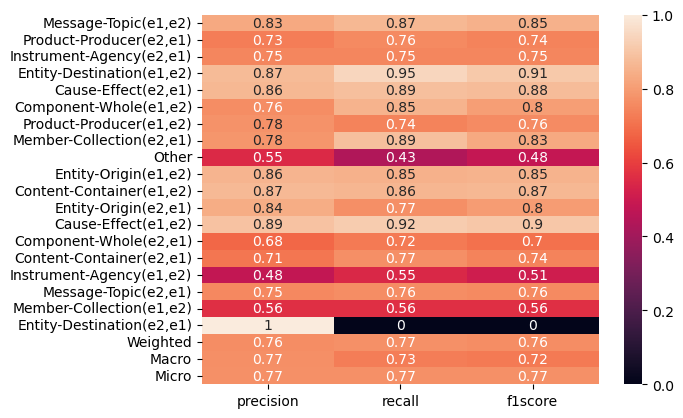

In [5]:
sbn.heatmap(tab,yticklabels=list,xticklabels=['precision','recall','f1score'],annot=True)